<a href="https://colab.research.google.com/github/0x416C657852/DiceClassificationCNN/blob/AlexTesting/DiceClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os
import cv2
from keras.optimizers import Adam
import pandas
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

#drag and drop the diceZip.zip file into the files section. this brings
#loadtimes from 75 minutes for the first epoch to 10 minutes
#and all further epochs fro15 8 minutes to 10



Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip -qq  "/content/drive/MyDrive/diceZip.zip" -d "/content/diceData"

In [6]:
train_path = 'diceData/dice/train'
test_path = 'diceData/dice/valid'

In [7]:
generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)# rotation_range=20, zoom_range=0.05, width_shift_range=0.05, height_shift_range=0.05, shear_range=0.05, horizontal_flip=True, fill_mode="nearest",
train_batches = generator.flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64,color_mode="rgb", subset='training',shuffle=True,seed=420)
valid_batches = generator.flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64,color_mode="rgb", subset='validation', shuffle=True,seed=420)
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64,color_mode="rgb",shuffle=True,seed=420)

Found 11429 images belonging to 6 classes.
Found 2855 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.


In [8]:
imgs, labels = next(train_batches)

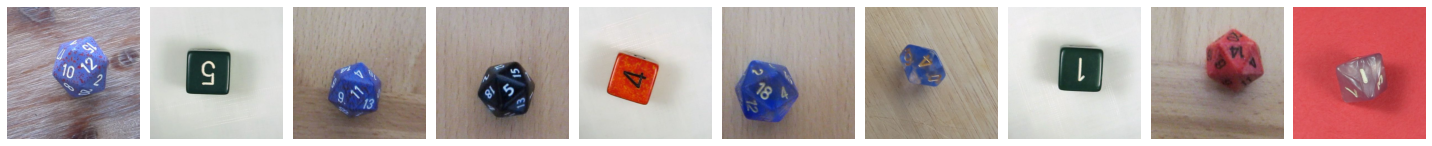

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0.

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [19]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same', input_shape=(480,480,3)),
    Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(units=6, activation='relu'),
    Dense(units=6, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 480, 480, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 480, 480, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 240, 240, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 240, 240, 64)      18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 240, 240, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 120, 120, 64)     

In [20]:
model.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(x=train_batches,
    validation_data=valid_batches,
    epochs=20,
     callbacks=[callback],
    verbose=1
)

Epoch 1/20
179/179 [==============================] - 383s 2s/step - loss: 1.5871 - accuracy: 0.2575 - val_loss: 1.6326 - val_accuracy: 0.1503
Epoch 2/20
179/179 [==============================] - 379s 2s/step - loss: 1.3447 - accuracy: 0.2764 - val_loss: 1.6280 - val_accuracy: 0.1527
Epoch 3/20
179/179 [==============================] - 380s 2s/step - loss: 1.2743 - accuracy: 0.2607 - val_loss: 1.7873 - val_accuracy: 0.1419
Epoch 4/20
179/179 [==============================] - 380s 2s/step - loss: 1.2286 - accuracy: 0.2498 - val_loss: 1.4879 - val_accuracy: 0.1292
Epoch 5/20
179/179 [==============================] - 379s 2s/step - loss: 1.2011 - accuracy: 0.2614 - val_loss: 1.7707 - val_accuracy: 0.1405
Epoch 6/20
179/179 [==============================] - 379s 2s/step - loss: 1.2044 - accuracy: 0.2781 - val_loss: 1.7110 - val_accuracy: 0.1338
Epoch 7/20
179/179 [==============================] - 379s 2s/step - loss: 1.1663 - accuracy: 0.2780 - val_loss: 1.7842 - val_accuracy: 0.1170

In [22]:
score = model.evaluate(test_batches, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 25s 747ms/step - loss: 1.2535 - accuracy: 0.5333
Test loss: 1.253477692604065
Test accuracy: 0.533301591873169


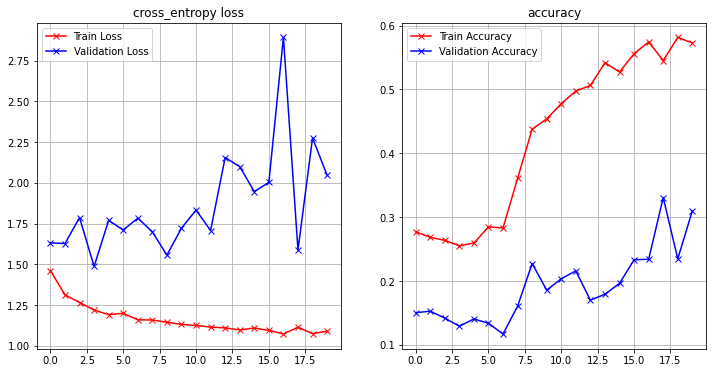

In [23]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)